In [75]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.impute import SimpleImputer

In [76]:

df = pd.read_csv("TS053-2021-4.csv")

# reconstruting the table
pivoted_df = df.pivot(
    index="Lower tier local authorities",
    columns="Occupancy rating for rooms (6 categories)",
    values="Observation"
).reset_index()


pivoted_df.to_csv("person per room 2021.csv", index=False)

In [77]:
df = pd.read_csv("TS054-2021-4 (1).csv")

# reconstruting the table
pivoted_df = df.pivot(
    index=["Lower tier local authorities Code", "Lower tier local authorities"],
    columns="Tenure of household (9 categories)",
    values="Observation"
).reset_index()

pivoted_df.to_csv("tenure 2021.csv", index=False)

In [78]:
# loading all the files
tenure_2011 = pd.read_csv("Tenure 2011.csv")
occupancy_2011 = pd.read_csv("person per room 2011.csv")
heating_2011 = pd.read_csv("heating2011.csv")
deprivation_2011 = pd.read_csv("Deprivation2011.csv")
occupancy_2021 = pd.read_csv("person per room 2021.csv")
tenure_2021 = pd.read_csv("tenure 2021.csv")


Working on Tenure (2011 & 2021)

In [79]:
tenure_2011.head()

,date,geography,geography code,Rural Urban,Tenure: All households; measures: Value,Tenure: Owned; measures: Value,Tenure: Owned: Owned outright; measures: Value,Tenure: Owned: Owned with a mortgage or loan; measures: Value,Tenure: Shared ownership (part owned and part rented); measures: Value,Tenure: Social rented; measures: Value,Tenure: Social rented: Rented from council (Local Authority); measures: Value,Tenure: Social rented: Other; measures: Value,Tenure: Private rented; measures: Value,Tenure: Private rented: Private landlord or letting agency; measures: Value,Tenure: Private rented: Other; measures: Value,Tenure: Living rent free; measures: Value
0,2011,Darlington,E06000005,Total,46670,30289,13810,16479,178,7228,5238,1990,8513,7758,755,462
1,2011,County Durham,E06000047,Total,223803,147347,69435,77912,488,45004,28559,16445,28142,25498,2644,2822
2,2011,Hartlepool,E06000001,Total,40434,24194,11090,13104,200,9515,4016,5499,5971,5525,446,554
3,2011,Middlesbrough,E06000002,Total,57203,32723,15200,17523,336,13654,6049,7605,9509,8648,861,981
4,2011,Northumberland,E06000057,Total,138534,91207,46086,45121,510,25841,14820,11021,18417,16225,2192,2559


In [80]:
tenure_2021.head()

,Lower tier local authorities Code,Lower tier local authorities,Does not apply,Lives rent free,Owned: Owns outright,Owned: Owns with a mortgage or loan,Private rented: Other private rented,Private rented: Private landlord or letting agency,Shared ownership: Shared ownership,Social rented: Other social rented,Social rented: Rents from council or Local Authority
0,E06000001,Hartlepool,0,68,12761,11073,856,6338,239,5608,3986
1,E06000002,Middlesbrough,0,115,17224,15913,1391,11286,330,7233,6773
2,E06000003,Redcar and Cleveland,0,41,22649,17205,1338,8410,346,6380,5269
3,E06000004,Stockton-on-Tees,0,79,27726,27686,1819,12388,385,6469,7204
4,E06000005,Darlington,0,20,16222,14474,1043,9035,190,2819,5112


**Renaming Tenure data 2011 to match 2021**



In [81]:
# Renaming columns in tenure_2011 to match tenure_2021
tenure_2011_renamed = tenure_2011.rename(columns={
    'Tenure: Owned: Owned outright; measures: Value': 'Owned: Owns outright',
    'Tenure: Owned: Owned with a mortgage or loan; measures: Value': 'Owned: Owns with a mortgage or loan',
    'Tenure: Private rented: Other; measures: Value': 'Private rented: Other private rented',
    'Tenure: Private rented: Private landlord or letting agency; measures: Value': 'Private rented: Private landlord or letting agency',
    'Tenure: Shared ownership (part owned and part rented); measures: Value': 'Shared ownership: Shared ownership',
    'Tenure: Social rented: Other; measures: Value': 'Social rented: Other social rented',
    'Tenure: Social rented: Rented from council (Local Authority); measures: Value': 'Social rented: Rents from council or Local Authority',
    'Tenure: Living rent free; measures: Value': 'Lives rent free'
})

# Keeping only the columns that exist in tenure_2021
columns_to_keep = [
    'geography',
    'geography code',
    'Lives rent free',
    'Owned: Owns outright',
    'Owned: Owns with a mortgage or loan',
    'Private rented: Other private rented',
    'Private rented: Private landlord or letting agency',
    'Shared ownership: Shared ownership',
    'Social rented: Other social rented',
    'Social rented: Rents from council or Local Authority'
]

tenure_2011_matched = tenure_2011_renamed[columns_to_keep]


In [82]:
tenure_2011_matched.head()


,geography,geography code,Lives rent free,Owned: Owns outright,Owned: Owns with a mortgage or loan,Private rented: Other private rented,Private rented: Private landlord or letting agency,Shared ownership: Shared ownership,Social rented: Other social rented,Social rented: Rents from council or Local Authority
0,Darlington,E06000005,462,13810,16479,755,7758,178,1990,5238
1,County Durham,E06000047,2822,69435,77912,2644,25498,488,16445,28559
2,Hartlepool,E06000001,554,11090,13104,446,5525,200,5499,4016
3,Middlesbrough,E06000002,981,15200,17523,861,8648,336,7605,6049
4,Northumberland,E06000057,2559,46086,45121,2192,16225,510,11021,14820


In [83]:
# Renaming first two columns in tenure_2021
tenure_2021 = tenure_2021.rename(columns={
    'Lower tier local authorities Code': 'geography code',
    'Lower tier local authorities': 'geography'
})

tenure_2021.head()

,geography code,geography,Does not apply,Lives rent free,Owned: Owns outright,Owned: Owns with a mortgage or loan,Private rented: Other private rented,Private rented: Private landlord or letting agency,Shared ownership: Shared ownership,Social rented: Other social rented,Social rented: Rents from council or Local Authority
0,E06000001,Hartlepool,0,68,12761,11073,856,6338,239,5608,3986
1,E06000002,Middlesbrough,0,115,17224,15913,1391,11286,330,7233,6773
2,E06000003,Redcar and Cleveland,0,41,22649,17205,1338,8410,346,6380,5269
3,E06000004,Stockton-on-Tees,0,79,27726,27686,1819,12388,385,6469,7204
4,E06000005,Darlington,0,20,16222,14474,1043,9035,190,2819,5112


In [84]:
tenure_2011_matched.to_csv('tenure_2011_cleaned.csv', index=False)
tenure_2021.to_csv('tenure_2021_cleaned.csv', index=False)


**Renaming occupancy data 2011 to match 2021**



In [85]:
occupancy_2011.head()

,date,geography,geography code,Rural Urban,Occupancy Rating: All categories: Occupancy rating (rooms); measures: Value,Occupancy Rating: Occupancy rating (rooms) of +2 or more; measures: Value,Occupancy Rating: Occupancy rating (rooms) of +1; measures: Value,Occupancy Rating: Occupancy rating (rooms) of 0; measures: Value,Occupancy Rating: Occupancy rating (rooms) of -1; measures: Value,Occupancy Rating: Occupancy rating (rooms) of -2 or less; measures: Value
0,2011,Darlington,E06000005,Total,46670,25099,11849,7598,1719,405
1,2011,County Durham,E06000047,Total,223803,115670,64427,35589,6768,1349
2,2011,Hartlepool,E06000001,Total,40434,20853,10637,7200,1411,333
3,2011,Middlesbrough,E06000002,Total,57203,27223,14938,11043,3061,938
4,2011,Northumberland,E06000057,Total,138534,78059,34151,21320,4201,803


In [86]:
occupancy_2021.head()

,Lower tier local authorities,Does not apply,Occupancy rating of rooms: +1,Occupancy rating of rooms: +2 or more,Occupancy rating of rooms: -1,Occupancy rating of rooms: -2 or less,Occupancy rating of rooms: 0
0,Adur,0,8715,11207,1433,177,6146
1,Allerdale,0,13512,23806,819,93,5743
2,Amber Valley,0,17345,28635,1308,159,8830
3,Arun,0,21975,31858,3499,428,14901
4,Ashfield,0,17123,26488,1699,252,8946


In [87]:
# Renaming columns in occupancy_2011 to match occupancy_2021
occupancy_2011_renamed = occupancy_2011.rename(columns={
    'Occupancy Rating: Occupancy rating (rooms) of +1; measures: Value': 'Occupancy rating of rooms: +1',
    'Occupancy Rating: Occupancy rating (rooms) of +2 or more; measures: Value': 'Occupancy rating of rooms: +2 or more',
    'Occupancy Rating: Occupancy rating (rooms) of 0; measures: Value': 'Occupancy rating of rooms: 0',
    'Occupancy Rating: Occupancy rating (rooms) of -1; measures: Value': 'Occupancy rating of rooms: -1',
    'Occupancy Rating: Occupancy rating (rooms) of -2 or less; measures: Value': 'Occupancy rating of rooms: -2 or less'
})

# Keeping only matching columns in occupancy_2011
columns_to_keep = [
    'geography',
    'geography code',
    'Occupancy rating of rooms: +1',
    'Occupancy rating of rooms: +2 or more',
    'Occupancy rating of rooms: -1',
    'Occupancy rating of rooms: -2 or less',
    'Occupancy rating of rooms: 0'
]

occupancy_2011_matched = occupancy_2011_renamed[columns_to_keep]

# Droping "Does not apply" column from occupancy_2021
occupancy_2021_cleaned = occupancy_2021.drop(columns=['Does not apply'])



# Mapping the 'geography code' from occupancy_2011_matched based on the (geography) name
occupancy_2021_cleaned['geography code'] = occupancy_2021_cleaned['Lower tier local authorities'].map(
    occupancy_2011_matched.set_index('geography')['geography code']
)
# Droping rows where 'geography code' is missing (NaN)
occupancy_2021_cleaned = occupancy_2021_cleaned.dropna(subset=['geography code'])

# Renaming the column 'Lower tier local authorities' to 'geography'
occupancy_2021_cleaned = occupancy_2021_cleaned.rename(columns={'Lower tier local authorities': 'geography'})



In [88]:
occupancy_2011_matched.head()


,geography,geography code,Occupancy rating of rooms: +1,Occupancy rating of rooms: +2 or more,Occupancy rating of rooms: -1,Occupancy rating of rooms: -2 or less,Occupancy rating of rooms: 0
0,Darlington,E06000005,11849,25099,1719,405,7598
1,County Durham,E06000047,64427,115670,6768,1349,35589
2,Hartlepool,E06000001,10637,20853,1411,333,7200
3,Middlesbrough,E06000002,14938,27223,3061,938,11043
4,Northumberland,E06000057,34151,78059,4201,803,21320


In [89]:
occupancy_2021_cleaned.tail()


,geography,Occupancy rating of rooms: +1,Occupancy rating of rooms: +2 or more,Occupancy rating of rooms: -1,Occupancy rating of rooms: -2 or less,Occupancy rating of rooms: 0,geography code
320,Wirral,38398,80068,3030,364,21392,E08000015
322,Wokingham,16463,39557,2004,251,10889,E06000041
323,Wolverhampton,28420,44577,5484,1153,25507,E08000031
326,Wrexham,17253,27698,1883,298,10781,W06000006
330,York,25351,38642,3465,294,17707,E06000014


In [90]:
occupancy_2011_matched.to_csv('occupancy_2011_cleaned.csv', index=False)
occupancy_2021_cleaned.to_csv('occupancy_2021_cleaned.csv', index=False)


**Checking the heating column**

In [91]:
heating_2011.head()

,date,geography,geography code,Rural Urban,Central Heating: All categories: Type of central heating in household; measures: Value,Central Heating: No central heating; measures: Value,Central Heating: Gas central heating; measures: Value,Central Heating: Electric (including storage heaters) central heating; measures: Value,Central Heating: Oil central heating; measures: Value,"Central Heating: Solid fuel (for example wood, coal) central heating; measures: Value",Central Heating: Other central heating; measures: Value,Central Heating: Two or more types of central heating; measures: Value
0,2011,Darlington,E06000005,Total,46670,814,40456,2762,713,139,333,1453
1,2011,County Durham,E06000047,Total,223803,1868,190999,6978,6121,5629,1788,10420
2,2011,Hartlepool,E06000001,Total,40434,580,35401,2113,147,75,527,1591
3,2011,Middlesbrough,E06000002,Total,57203,1042,49104,3622,65,43,848,2479
4,2011,Northumberland,E06000057,Total,138534,1858,104652,7180,11564,4643,1331,7306


**Renaming the deprivation data**

In [92]:
deprivation_2011 = pd.read_csv('Deprivation2011.csv')

# Renaming the columns
deprivation_2011.columns = [
    "date",
    "geography",
    "geography code",
    "rural urban",
    "total households",
    "not deprived",
    "deprived 1D",
    "deprived 2D",
    "deprived 3D",
    "deprived 4D"
]


In [93]:
deprivation_2011.head()

,date,geography,geography code,rural urban,total households,not deprived,deprived 1D,deprived 2D,deprived 3D,deprived 4D
0,2011,Darlington,E06000005,Total,46670,20184,14922,8954,2407,203
1,2011,County Durham,E06000047,Total,223803,87986,68885,51846,14353,733
2,2011,Hartlepool,E06000001,Total,40434,14351,12821,9970,3104,188
3,2011,Middlesbrough,E06000002,Total,57203,19729,18615,13717,4789,353
4,2011,Northumberland,E06000057,Total,138534,60451,44844,26716,6150,373


In [94]:
deprivation_2011.to_csv("Deprivation2011_cleaned.csv", index=False)


**Merging all 2011 datasets**

In [95]:
tenure_2011_matched = pd.read_csv('tenure_2011_cleaned.csv')
occupancy_2011_matched = pd.read_csv('occupancy_2011_cleaned.csv')
heating_2011 = pd.read_csv('heating2011.csv')
deprivation_2011 = pd.read_csv('Deprivation2011_cleaned.csv')

# Merging the DataFrames sequentially on both "geography" and "geography code"
merged_2011_df = pd.merge(tenure_2011_matched, occupancy_2011_matched,
                           on=["geography", "geography code"], how="outer")
merged_2011_df = pd.merge(merged_2011_df, heating_2011,
                           on=["geography", "geography code"], how="outer")
merged_2011_df = pd.merge(merged_2011_df, deprivation_2011,
                           on=["geography", "geography code"], how="outer")

merged_2011_df = merged_2011_df.drop(columns=['date_x', 'Rural Urban', 'date_y', 'Rural Urban','rural urban'])


In [96]:
merged_2011_df.head()


,geography,geography code,Lives rent free,Owned: Owns outright,Owned: Owns with a mortgage or loan,Private rented: Other private rented,Private rented: Private landlord or letting agency,Shared ownership: Shared ownership,Social rented: Other social rented,Social rented: Rents from council or Local Authority,...,Central Heating: Oil central heating; measures: Value,"Central Heating: Solid fuel (for example wood, coal) central heating; measures: Value",Central Heating: Other central heating; measures: Value,Central Heating: Two or more types of central heating; measures: Value,total households,not deprived,deprived 1D,deprived 2D,deprived 3D,deprived 4D
0,Barking and Dagenham,E09000002,664,11908,20416,769,11559,906,3677,19782,...,50,58,2121,3274,69681,19618,24953,18382,6027,701
1,Barnet,E09000003,2187,38105,40245,1679,33175,1191,7670,11664,...,183,51,2695,5436,135916,58764,45413,24122,6669,948
2,Barnsley,E08000016,1594,30778,34029,1044,11812,445,3201,17831,...,898,2979,1077,3462,100734,36661,30916,25329,7393,435
3,Bath and North East Somerset,E06000022,1018,25827,23241,1039,11408,368,8086,2528,...,3580,650,511,2760,73515,36446,23106,11348,2351,264
4,Bedford,E06000055,848,20018,21919,800,9310,665,9097,1155,...,3256,397,861,2693,63812,29041,20595,11212,2671,293


In [97]:
merged_2011_df.to_csv('merged_2011_data.csv', index=False)


**Checking if have missing values in merge 2011 and if yes filing with BayesianRidge**

In [98]:
merged_2011_df.isnull().sum()

,0
geography,0
geography code,0
Lives rent free,0
Owned: Owns outright,0
Owned: Owns with a mortgage or loan,0
Private rented: Other private rented,0
Private rented: Private landlord or letting agency,0
Shared ownership: Shared ownership,0
Social rented: Other social rented,0
Social rented: Rents from council or Local Authority,0


**Merging 2021 data**

In [99]:
tenure_2021_matched = pd.read_csv('tenure_2021_cleaned.csv')
occupancy_2021_matched = pd.read_csv('occupancy_2021_cleaned.csv')

In [100]:
merged_df = pd.merge(
    tenure_2021_matched,
    occupancy_2021_matched,
    on=["geography", "geography code"],
    how="inner"
)
merged_df.drop(columns=['Does not apply'], inplace=True)
merged_df.head()

,geography code,geography,Lives rent free,Owned: Owns outright,Owned: Owns with a mortgage or loan,Private rented: Other private rented,Private rented: Private landlord or letting agency,Shared ownership: Shared ownership,Social rented: Other social rented,Social rented: Rents from council or Local Authority,Occupancy rating of rooms: +1,Occupancy rating of rooms: +2 or more,Occupancy rating of rooms: -1,Occupancy rating of rooms: -2 or less,Occupancy rating of rooms: 0
0,E06000001,Hartlepool,68,12761,11073,856,6338,239,5608,3986,12148,20016,1146,149,7472
1,E06000002,Middlesbrough,115,17224,15913,1391,11286,330,7233,6773,17235,29141,2104,433,11349
2,E06000003,Redcar and Cleveland,41,22649,17205,1338,8410,346,6380,5269,17889,32062,1346,181,10160
3,E06000004,Stockton-on-Tees,79,27726,27686,1819,12388,385,6469,7204,23181,45141,2028,423,12984
4,E06000005,Darlington,20,16222,14474,1043,9035,190,2819,5112,14827,24332,1106,148,8506


In [101]:
merged_df.isnull().sum()

,0
geography code,0
geography,0
Lives rent free,0
Owned: Owns outright,0
Owned: Owns with a mortgage or loan,0
Private rented: Other private rented,0
Private rented: Private landlord or letting agency,0
Shared ownership: Shared ownership,0
Social rented: Other social rented,0
Social rented: Rents from council or Local Authority,0


In [102]:
merged_df.to_csv('merged_2021_data.csv', index=False)

In [103]:

df_2011 = pd.read_csv('merged_2011_data.csv')
df_2021 = pd.read_csv('merged_2021_data.csv')

# Adding the date column
df_2011['date'] = 2011
df_2021['date'] = 2021

df_2011.to_csv('2011data_with_date.csv', index=False)
df_2021.to_csv('2021data_with_date.csv', index=False)



In [104]:

df_2011 = pd.read_csv("2011data_with_date.csv")
df_2021 = pd.read_csv("2021data_with_date.csv")

common_geography = df_2011[df_2011['geography'].isin(df_2021['geography'])]

df_combined = pd.concat([common_geography, df_2021[df_2021['geography'].isin(df_2011['geography'])]], ignore_index=True)


# Reorder columns to make 'date' the first column
columns = ['date'] + [col for col in df_combined.columns if col != 'date']
df_combined = df_combined[columns]

# Save the combined file
df_combined.to_csv("Final_merge.csv", index=False)

# Check the final output
df_combined.head()


,date,geography,geography code,Lives rent free,Owned: Owns outright,Owned: Owns with a mortgage or loan,Private rented: Other private rented,Private rented: Private landlord or letting agency,Shared ownership: Shared ownership,Social rented: Other social rented,...,Central Heating: Oil central heating; measures: Value,"Central Heating: Solid fuel (for example wood, coal) central heating; measures: Value",Central Heating: Other central heating; measures: Value,Central Heating: Two or more types of central heating; measures: Value,total households,not deprived,deprived 1D,deprived 2D,deprived 3D,deprived 4D
0,2011,Barking and Dagenham,E09000002,664,11908,20416,769,11559,906,3677,...,50.0,58.0,2121.0,3274.0,69681.0,19618.0,24953.0,18382.0,6027.0,701.0
1,2011,Barnet,E09000003,2187,38105,40245,1679,33175,1191,7670,...,183.0,51.0,2695.0,5436.0,135916.0,58764.0,45413.0,24122.0,6669.0,948.0
2,2011,Barnsley,E08000016,1594,30778,34029,1044,11812,445,3201,...,898.0,2979.0,1077.0,3462.0,100734.0,36661.0,30916.0,25329.0,7393.0,435.0
3,2011,Bath and North East Somerset,E06000022,1018,25827,23241,1039,11408,368,8086,...,3580.0,650.0,511.0,2760.0,73515.0,36446.0,23106.0,11348.0,2351.0,264.0
4,2011,Bedford,E06000055,848,20018,21919,800,9310,665,9097,...,3256.0,397.0,861.0,2693.0,63812.0,29041.0,20595.0,11212.0,2671.0,293.0


In [105]:
df_combined.isnull().sum()

,0
date,0
geography,0
geography code,0
Lives rent free,0
Owned: Owns outright,0
Owned: Owns with a mortgage or loan,0
Private rented: Other private rented,0
Private rented: Private landlord or letting agency,0
Shared ownership: Shared ownership,0
Social rented: Other social rented,0


In [106]:
# Loading the merged dataset
df = pd.read_csv("Final_merge.csv")

# List of occupancy columns that need imputation
occupancy_columns = [
    "Occupancy rating of rooms: +1",
    "Occupancy rating of rooms: +2 or more",
    "Occupancy rating of rooms: -1",
    "Occupancy rating of rooms: -2 or less",
    "Occupancy rating of rooms: 0"
]

# List of numerical columns that need imputation using regression
numerical_columns = [
    "Central Heating: All categories: Type of central heating in household; measures: Value",
    "Central Heating: No central heating; measures: Value",
    "Central Heating: Gas central heating; measures: Value",
    "Central Heating: Electric (including storage heaters) central heating; measures: Value",
    "Central Heating: Oil central heating; measures: Value",
    "Central Heating: Solid fuel (for example wood, coal) central heating; measures: Value",
    "Central Heating: Other central heating; measures: Value",
    "Central Heating: Two or more types of central heating; measures: Value",
    "total households",
    "not deprived",
    "deprived 1D",
    "deprived 2D",
    "deprived 3D",
    "deprived 4D"
]

# List of categorical columns that need imputation using mode
categorical_columns = [
    "date", "geography", "geography code", "Lives rent free",
    "Owned: Owns outright", "Owned: Owns with a mortgage or loan",
    "Private rented: Other private rented", "Private rented: Private landlord or letting agency",
    "Shared ownership: Shared ownership", "Social rented: Other social rented",
    "Social rented: Rents from council or Local Authority"
]

# Imputation for categorical columns using mode
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        print(f"Imputing categorical column '{col}' with mode...")
        mode_imputer = SimpleImputer(strategy='most_frequent')
        df[col] = mode_imputer.fit_transform(df[[col]])

# predictors for Bayesian Ridge Regression
predictors = [
    "Owned: Owns outright",
    "deprived 1D",
    "Central Heating: Gas central heating; measures: Value"
]

# Imputing missing values in the predictors
print("Imputing missing values in predictors...")
predictor_imputer = SimpleImputer(strategy='mean')
df[predictors] = predictor_imputer.fit_transform(df[predictors])

# Imputing missing values for numerical columns using Bayesian Ridge Regression
for col in numerical_columns:
    if df[col].isnull().sum() > 0:
        print(f"\nImputing numerical column '{col}' ({df[col].isnull().sum()} missing values)...")

        # Training data
        train_data = df.dropna(subset=[col] + predictors)
        X_train = train_data[predictors].values
        y_train = train_data[col].values

        # Fit Bayesian Ridge Regression model
        model = BayesianRidge()
        model.fit(X_train, y_train)

        # Predicting for rows with missing target values
        missing_mask = df[col].isnull()
        X_missing = df.loc[missing_mask, predictors].values
        imputed_values = model.predict(X_missing)

        # Fill missing values in the original DataFrame
        df.loc[missing_mask, col] = imputed_values

        print(f"Filled {missing_mask.sum()} missing values in '{col}'.")

df.to_csv("Final _all.csv", index=False)



Imputing missing values in predictors...

Imputing numerical column 'Central Heating: All categories: Type of central heating in household; measures: Value' (141 missing values)...
Filled 141 missing values in 'Central Heating: All categories: Type of central heating in household; measures: Value'.

Imputing numerical column 'Central Heating: No central heating; measures: Value' (141 missing values)...
Filled 141 missing values in 'Central Heating: No central heating; measures: Value'.

Imputing numerical column 'Central Heating: Electric (including storage heaters) central heating; measures: Value' (141 missing values)...
Filled 141 missing values in 'Central Heating: Electric (including storage heaters) central heating; measures: Value'.

Imputing numerical column 'Central Heating: Oil central heating; measures: Value' (141 missing values)...
Filled 141 missing values in 'Central Heating: Oil central heating; measures: Value'.

Imputing numerical column 'Central Heating: Solid fuel (

In [107]:
df.isnull().sum()

,0
date,0
geography,0
geography code,0
Lives rent free,0
Owned: Owns outright,0
Owned: Owns with a mortgage or loan,0
Private rented: Other private rented,0
Private rented: Private landlord or letting agency,0
Shared ownership: Shared ownership,0
Social rented: Other social rented,0


**Performing PCA and T-SNE**

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from google.colab import files

df = pd.read_csv('Final _all.csv')

# Calculating derived features
df["%_private_rented"] = df["Private rented: Private landlord or letting agency"] / df["total households"]* 100
df["%_owned_outright"] = df["Owned: Owns outright"] / df["total households"]*100
df["%_deprived"] = (df["deprived 1D"] + df["deprived 2D"] + df["deprived 3D"] + df["deprived 4D"]) / df["total households"]* 100
df["%_no_central_heating"] = df["Central Heating: No central heating; measures: Value"] / df["total households"]* 100
df["%_overcrowded"] = (
    df["Occupancy rating of rooms: -1"] + df["Occupancy rating of rooms: -2 or less"]
) / df["total households"]*100

# Select and scale features
features = ["%_private_rented", "%_deprived", "%_overcrowded","%_no_central_heating"]
X = df[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction
pca = PCA(n_components=2)
df[["PC1", "PC2"]] = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df[["tSNE1", "tSNE2"]] = tsne.fit_transform(X_scaled)

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

# Interpret cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
cluster_centers["cluster"] = cluster_centers.index
print("Cluster Characteristics:\n", cluster_centers)

# Assign descriptive labels to clusters
def name_cluster(row):
    if row['cluster'] == 0:
        return "Low Deprivation & Renting"
    elif row['cluster'] == 1:
        return "High Overcrowding & Deprivation"
    elif row['cluster'] == 2:
        return "Moderate Everything"
    else:
        return "Unknown"

df["cluster_label"] = df.apply(name_cluster, axis=1)

# Saving for Tableau
df.to_csv("visualization_outputs.csv", index=False)



Cluster Characteristics:
    %_private_rented  %_deprived  %_overcrowded  %_no_central_heating  cluster
0         17.786252   51.044553       6.377616              2.629671        0
1         13.245674   61.461582       5.180211              2.784458        1
2         32.014250   61.044866      21.429705              3.304786        2


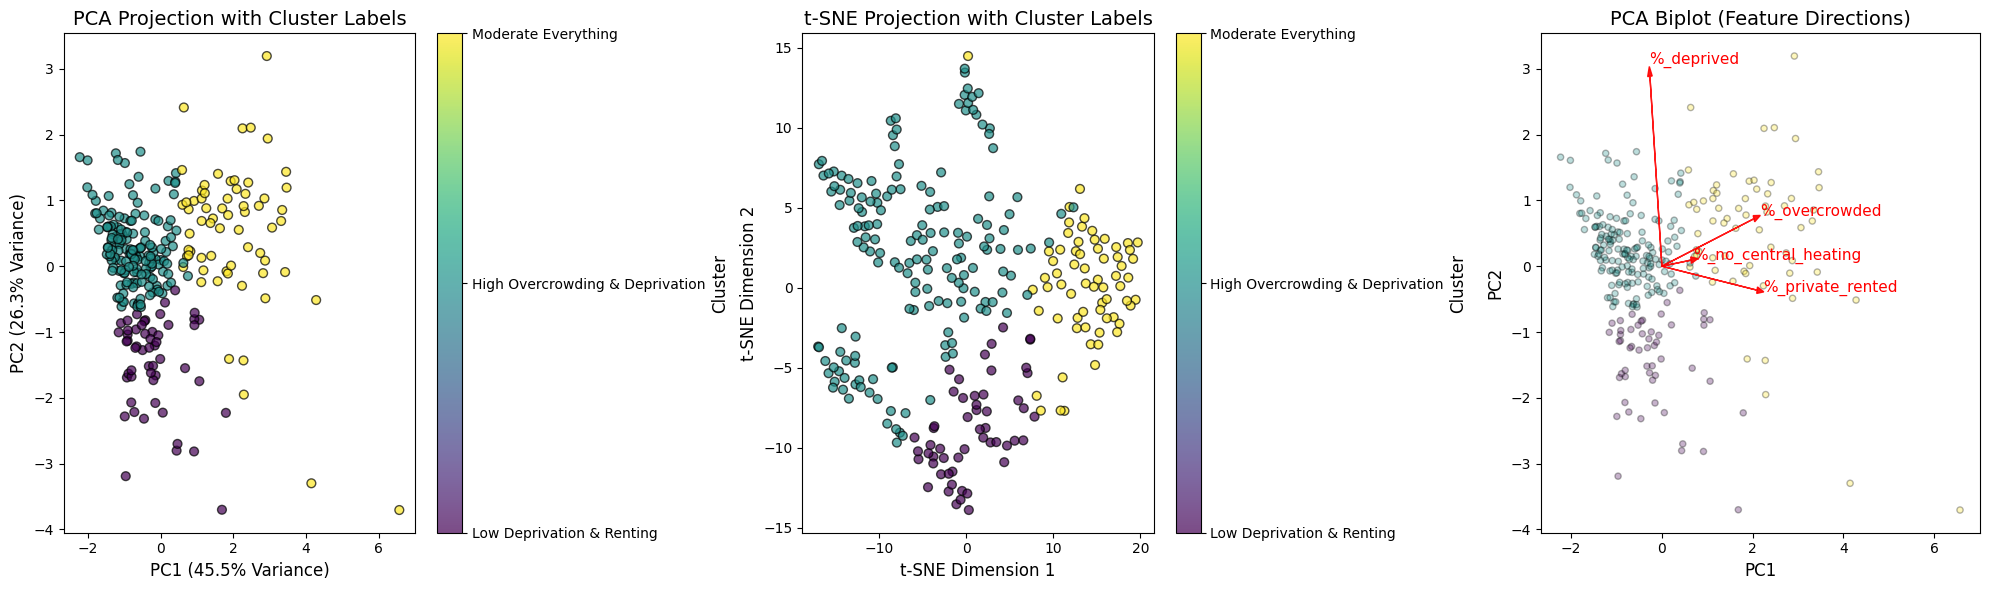

In [109]:
plt.figure(figsize=(20, 6))

# PCA Projection
plt.subplot(1, 3, 1)
scatter1 = plt.scatter(df["PC1"], df["PC2"], c=df["cluster"], cmap="viridis", s=40, alpha=0.7, edgecolor='k')
plt.title("PCA Projection with Cluster Labels", fontsize=14)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)", fontsize=12)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)", fontsize=12)
cbar1 = plt.colorbar(scatter1)
cbar1.set_label('Cluster', fontsize=12)
cbar1.set_ticks([0, 1, 2])
cbar1.set_ticklabels([
    "Low Deprivation & Renting",
    "High Overcrowding & Deprivation",
    "Moderate Everything"
])

# t-SNE Projection
plt.subplot(1, 3, 2)
scatter2 = plt.scatter(df["tSNE1"], df["tSNE2"], c=df["cluster"], cmap="viridis", s=40, alpha=0.7, edgecolor='k')
plt.title("t-SNE Projection with Cluster Labels", fontsize=14)
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)
cbar2 = plt.colorbar(scatter2)
cbar2.set_label('Cluster', fontsize=12)
cbar2.set_ticks([0, 1, 2])
cbar2.set_ticklabels([
    "Low Deprivation & Renting",
    "High Overcrowding & Deprivation",
    "Moderate Everything"
])

# PCA Biplot
plt.subplot(1, 3, 3)
plt.scatter(df["PC1"], df["PC2"], c=df["cluster"], cmap="viridis", s=20, alpha=0.3, edgecolor='k')
loadings = pca.components_.T
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3, color='red', alpha=0.9, head_width=0.1)
    plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, feature, color='red', fontsize=11)
plt.title("PCA Biplot (Feature Directions)", fontsize=14)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)

plt.tight_layout()
plt.show()


In [110]:
df =pd.read_csv("visualization_outputs.csv")
df.head()

,date,geography,geography code,Lives rent free,Owned: Owns outright,Owned: Owns with a mortgage or loan,Private rented: Other private rented,Private rented: Private landlord or letting agency,Shared ownership: Shared ownership,Social rented: Other social rented,...,%_owned_outright,%_deprived,%_no_central_heating,%_overcrowded,PC1,PC2,tSNE1,tSNE2,cluster,cluster_label
0,2011,Barking and Dagenham,E09000002,664,11908.0,20416,769,11559,906,3677,...,17.089307,71.845984,2.916146,20.141789,0.634515,2.413410,13.065204,6.183289,2,Moderate Everything
1,2011,Barnet,E09000003,2187,38105.0,40245,1679,33175,1191,7670,...,28.035699,56.764472,2.171930,18.017746,1.114786,-0.241944,10.427113,0.902251,2,Moderate Everything
2,2011,Barnsley,E08000016,1594,30778.0,34029,1044,11812,445,3201,...,30.553736,63.606131,0.925209,4.288522,-1.185045,0.592508,-14.600517,-5.212556,1,High Overcrowding & Deprivation
3,2011,Bath and North East Somerset,E06000022,1018,25827.0,23241,1039,11408,368,8086,...,35.131606,50.423723,2.309733,6.899272,-0.329438,-1.518877,-0.899744,-10.612194,0,Low Deprivation & Renting
4,2011,Bedford,E06000055,848,20018.0,21919,800,9310,665,9097,...,31.370275,54.489751,2.016862,7.655300,-0.425956,-0.820340,-3.729641,-8.765013,0,Low Deprivation & Renting


**Predicting for 2030**

In [111]:
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge

df = pd.read_csv("visualization_outputs.csv")

# Extracting list of all unique regions
regions = df['geography'].unique()

# Key metrics to predict
target_features = [
    "%_private_rented",
    "%_deprived",
    "%_overcrowded",
    "%_no_central_heating"
]

# Creating dataframe for 2030 predictions
predictions_2030 = []

for region in regions:
    region_data = df[df['geography'] == region]

    if len(region_data) >= 1:
        pred_row = {
            'geography': region,
            'geography code': region_data['geography code'].iloc[0],
            'date': 2030
        }

        # Predicting each feature
        for feature in target_features:

            X = region_data[['date']].values
            y = region_data[feature].values

            if len(X) >= 2:
                # Training BayesianRidge model
                model = BayesianRidge()
                model.fit(X, y)

                # Predicting for 2030
                pred_value = model.predict([[2030]])[0]


                pred_row[feature] = pred_value
            elif len(X) == 1:
                # Calculating average yearly change across all regions
                all_regions_avg_change = 0
                regions_with_data = 0

                for other_region in regions:
                    other_data = df[df['geography'] == other_region]
                    if len(other_data) >= 2:
                        first_val = other_data.sort_values('date')[feature].iloc[0]
                        last_val = other_data.sort_values('date')[feature].iloc[-1]
                        first_year = other_data.sort_values('date')['date'].iloc[0]
                        last_year = other_data.sort_values('date')['date'].iloc[-1]

                        if first_val != 0:  # Avoid division by zero
                            yearly_change = (last_val - first_val) / (last_year - first_year)
                            all_regions_avg_change += yearly_change
                            regions_with_data += 1

                if regions_with_data > 0:
                    avg_yearly_change = all_regions_avg_change / regions_with_data
                    base_value = region_data[feature].iloc[0]
                    base_year = region_data['date'].iloc[0]
                    pred_value = base_value + avg_yearly_change * (2030 - base_year)
                else:

                    pred_value = region_data[feature].iloc[0]

                pred_row[feature] = pred_value

        # Add the row to the predictions
        predictions_2030.append(pred_row)

# Convert to DataFrame
predictions_df = pd.DataFrame(predictions_2030)

# Copy non-predicted columns from the most recent data point for each region
for region in regions:
    region_data = df[df['geography'] == region]
    if not region_data.empty:
        latest_data = region_data.loc[region_data['date'].idxmax()]
        region_idx = predictions_df['geography'] == region

        if any(region_idx):
            # Copy all columns that aren't already in predictions_df
            for col in df.columns:
                if col not in predictions_df.columns and col != 'date':
                    predictions_df.loc[region_idx, col] = latest_data[col]

# Ensuring the columns are in a logical order
column_order = ['date', 'geography', 'geography code',"%_private_rented",
    "%_deprived",
    "%_overcrowded",
    "%_no_central_heating"]
predictions_df = predictions_df[column_order]

# Save the file for tableau
predictions_df.to_csv("regions_predictions_2030.csv", index=False)

print(f"Predictions for {len(predictions_df)} regions in 2030 have been saved to 'regions_predictions_2030.csv'")

Predictions for 141 regions in 2030 have been saved to 'regions_predictions_2030.csv'
